# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [15]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funkcji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedziały, w którym znajdują się miejsca zerowe naszej funkcji.

W jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji?

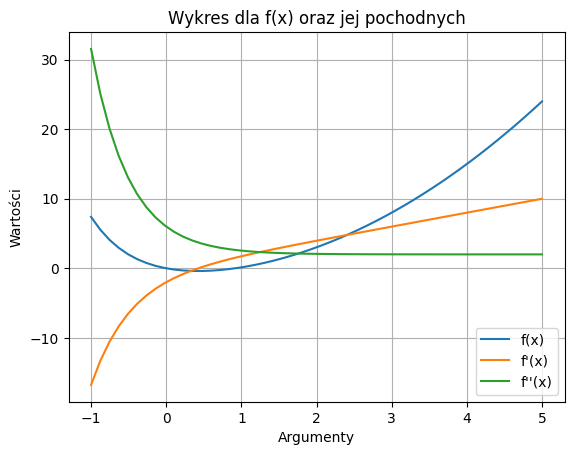

In [16]:
x = np.linspace(-1,5)

y = main.fun(x)
dy = main.dfun(x)
ddy = main.ddfun(x)

plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='f\'(x)')
plt.plot(x,ddy, label='f\'\'(x)')
plt.ylabel('Wartości')
plt.xlabel('Argumenty')
plt.title('Wykres dla f(x) oraz jej pochodnych')
plt.legend()
plt.grid()
plt.show()


Miejsca zerowe znajdują się w przedziale <-0.25, 0.25> oraz <0.9, 1.1>

***Zadanie 2.***  
Najprostszą metodą do wyznaczenia miejsca zerowego funkcji nieliniowej jest metoda bisekcji. Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Pamiętaj, że gwarancją zbieżności działania funkcji są założenia:

1) funkcja jest ciągła na danym przedziale $[a,b]$

2) wartość funkcji na końcach przedziału przyjmuje przeciwne znaki (tzn. $f(a)*f(b)<0$)

***Zadanie 3.***  
Inną metodą, wykorzystywaną do poszukiwania miejsca zerowego funkcji jest metoda Newtona. Wykorzystuję ona wartość pierwszej pochodnej do wyznaczenia wartości.

1) zaimplementuj iloraz różnicowy. 
2) wygeneruj wektor 10 elementowy
3) sprawdź działanie funkcji dla danego wektora oraz  $h=0.00001$ oraz z wartościami uzyskanymi z funkcją wyliczoną analityczną.

Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale $[a,b]$

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym $[a,b]$

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak ekstremów lokalnych i punktów przegięcia)


In [17]:
vec = np.linspace(1, 10, 10)
h = 0.00001

ans = main.difference_quotient(main.fun, vec, h)
ans_2 = main.dfun(vec)


result = ans - ans_2
print("Różnica pomiędzy wartościami wyliczonymi za pomocą ilorazu różnicowego a wartościami analitycznymi:\n", abs(result))



Różnica pomiędzy wartościami wyliczonymi za pomocą ilorazu różnicowego a wartościami analitycznymi:
 [1.27066952e-05 1.03663448e-05 1.00495912e-05 1.00061666e-05
 1.00001138e-05 9.99931226e-06 1.00000359e-05 1.00001116e-05
 9.99798256e-06 9.99928036e-06]


***Zadania 4.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [18]:
# za pomocą funkcji root
root_result = scipy.optimize.root(main.fun, [0, 1])
print("Miejsca zerowe dla funkcji root: ", root_result.x[0]," oraz ", root_result.x[1])

Miejsca zerowe dla funkcji root:  0.0  oraz  0.9165625831056987


In [19]:
# za pomocą funkcji fsolve
fsolve_result = scipy.optimize.fsolve(main.fun, [0, 1])
print("Miejsca zerowe dla funkcji fsolve: ", fsolve_result[0], " oraz ", fsolve_result[1])

Miejsca zerowe dla funkcji fsolve:  0.0  oraz  0.9165625831056987


***Zadanie 5.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 4) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

[4.656612873077393e-10, 9.191619259508066e-11] 
 [5.532653224449291e-10, 1.7763568394002505e-15]


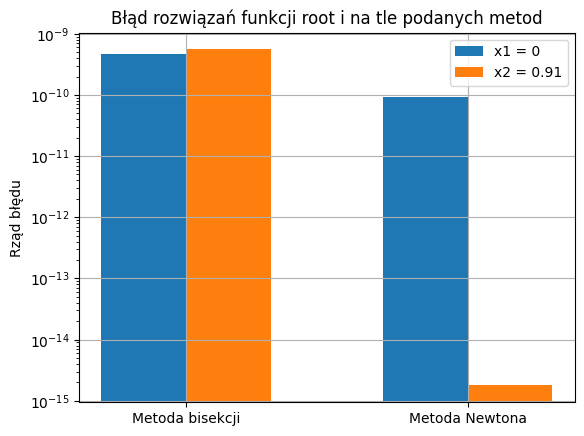

In [20]:
tolerance = 10e-10

first_root_error = []
second_root_error = []

# metoda bisekcji
roots_bisection = main.bisection(-0.5, 0.25, main.fun, tolerance, 100), main.bisection(0.9, 1.1, main.fun, tolerance, 100)

first_root_error.append(abs(root_result.x[0] - roots_bisection[0][0]))
second_root_error.append(abs(root_result.x[1] - roots_bisection[1][0]))

# metoda newtona
roots_newton = main.newton(main.fun, main.dfun, main.ddfun, -0.5, 0.25, tolerance, 100), main.newton(main.fun, main.dfun, main.ddfun, 0.9, 1.1, tolerance, 100) 
first_root_error.append(abs(root_result.x[0] - roots_newton[0][0]))
second_root_error.append(abs(root_result.x[1] - roots_newton[1][0]))

index = ["Bisekcja", "Newton"]

print(first_root_error, "\n",second_root_error)
funs = ['Metoda bisekcji', 'Metoda Newtona']
width = 0.3
x = np.arange(len(funs))
fig, ax = plt.subplots()

a = ax.bar(x - width/2, first_root_error, width, label = 'x1 = 0')
b = ax.bar(x + width/2, second_root_error, width, label = 'x2 = 0.91')


ax.set_title("Błąd rozwiązań funkcji root i na tle podanych metod")
ax.set_xticks(x)
ax.set_xticklabels(funs)
ax.set_ylabel('Rząd błędu')
plt.yscale('log')
ax.legend()
plt.grid()
plt.show()



The slowest run took 4.79 times longer than the fastest. This could mean that an intermediate result is being cached.
759 ns ± 267 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
751 ns ± 87.3 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
741 ns ± 46.7 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
772 ns ± 103 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
759 ns ± 118 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
741 ns ± 84.5 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
751 ns ± 74 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
790 ns ± 200 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
717 ns ± 21.3 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
780 ns ± 134 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
727 ns ± 12.3 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.13 times longer than the fastest. This could mean that an inter

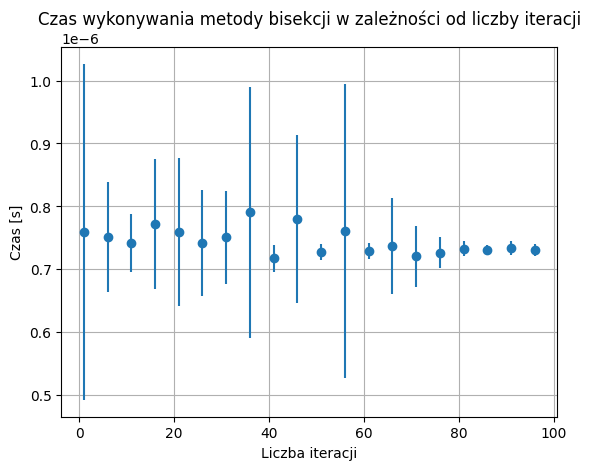

In [21]:
# badanie czasu obliczeń dla metody bisekcji
error = []
time = []
x = np.arange(1, 100, 5)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.bisection(-0.5, 0.25, main.fun, tolerance, iteration=i)
    time.append(avg_time.average)
    error.append(avg_time.stdev)
    
plt.errorbar(x, time,yerr=error, marker="o", linestyle='None')
plt.ylabel("Czas [s]")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania metody bisekcji w zależności od liczby iteracji")
plt.grid()
plt.show()

14.8 µs ± 1.87 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
32.6 µs ± 1.8 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
33.3 µs ± 3.26 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
34.1 µs ± 3.86 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
32.3 µs ± 1.2 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
33 µs ± 1.98 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
32.8 µs ± 1.93 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
32.5 µs ± 1.58 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
33.3 µs ± 3.07 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
33.7 µs ± 3.82 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
34.3 µs ± 4.41 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
34.1 µs ± 4.14 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
33.6 µs ± 3.62 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
32.3 µs ± 2.03 µs per loop (mean ± std. de

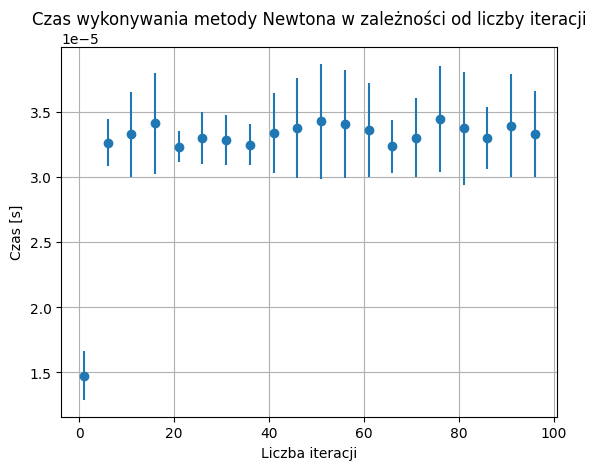

In [22]:
# badanie czasu obliczeń dla metody newtona

error = []
time = []
x = np.arange(1, 100, 5)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.newton(main.fun, main.dfun, main.ddfun, -0.5, 0.25, tolerance, iteration=i)
    time.append(avg_time.average)
    error.append(avg_time.stdev)
    
plt.errorbar(x, time,yerr=error, marker="o", linestyle='None')
plt.ylabel("Czas [s]")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania metody Newtona w zależności od liczby iteracji")
plt.grid()
plt.show()